# Álgebra Linear

In [89]:
import numpy as np
import sympy as sym
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Math
from PIL import Image

### Vetores de Linhas

In [5]:
vetor_linhas = np.array([4,2])
print(vetor_linhas)
display(Math(sym.latex(sym.sympify(vetor_linhas))))

[4 2]


<IPython.core.display.Math object>

### Vetores de Colunas

In [6]:
vetor_colunas = np.array([[-2],[3]])
print(vetor_colunas)
display(Math(sym.latex(sym.sympify(vetor_colunas))))

[[-2]
 [ 3]]


<IPython.core.display.Math object>

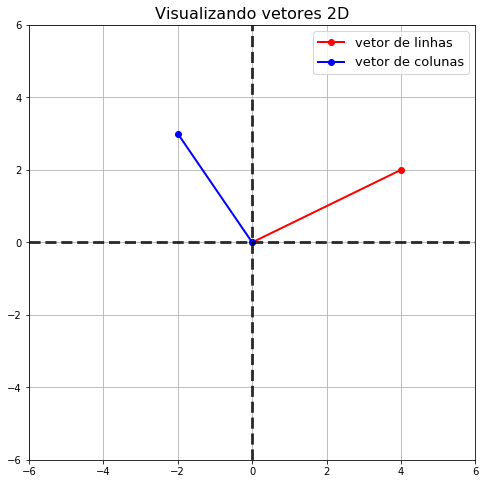

In [148]:
plt.figure(figsize=(8,8))
plt.plot([0,vetor_linhas[0]],[0,vetor_linhas[1]], 'ro-', label='vetor de linhas', linewidth=2)
plt.plot([0,vetor_colunas[0]],[0,vetor_colunas[1]], 'bo-', label='vetor de colunas', linewidth=2)
plt.plot([-6,6],[0,0],'k--',linewidth=3, alpha=0.77)
plt.plot([0,0],[-6,6],'k--',linewidth=3, alpha=0.77)
plt.axis([-6,6,-6,6])
plt.grid()
plt.legend(fontsize=13)
plt.title('Visualizando vetores 2D', fontsize=16)
plt.show()

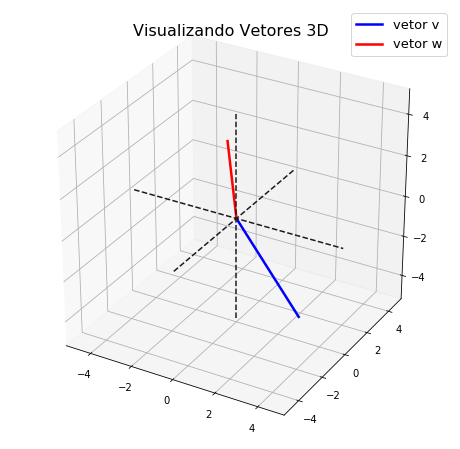

In [86]:
v = np.array([3,0,-4])
w = np.array([-1,1,3])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v[0]],[0,v[1]],[0,v[2]], 'b', linewidth=2.5, label='vetor v')
ax.plot([0,w[0]],[0,w[1]],[0,w[2]], 'r', linewidth=2.5, label='vetor w')
ax.plot([-5,5],[0,0],[0,0], '--', color=[0.1,0.1,0.1])
ax.plot([0,0],[-5,5],[0,0], '--', color=[0.1,0.1,0.1])
ax.plot([0,0],[0,0],[-5,5], '--', color=[0.1,0.1,0.1])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.legend(fontsize=13)
plt.title('Visualizando Vetores 3D', fontsize=16)
plt.show()

### Multiplicação por Escalares

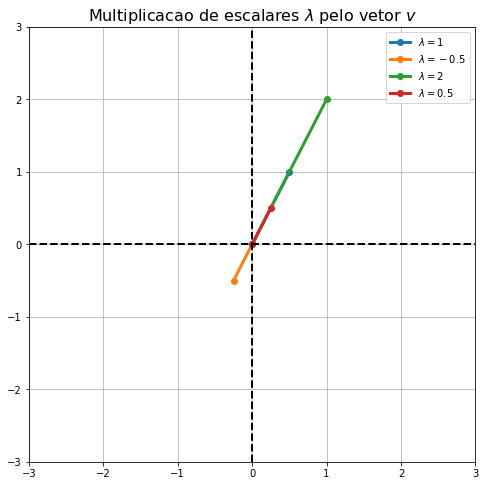

In [83]:
v = np.array([0.5,1])
escalares = [1,-0.5,2,0.5]

plt.figure(figsize=(8,8))

for e in escalares:
    sv = e * v 
    plt.plot([0,sv[0]], [0,sv[1]], 'o-', linewidth=3, label='$\\lambda=%g$' %e)

plt.axis([-3,3,-3,3])
plt.plot([-3,3],[0,0],'k--',linewidth=2)
plt.plot([0,0],[-3,3],'k--',linewidth=2)
plt.title('Multiplicacao de escalares $\lambda$ pelo vetor $v$', fontsize=16)
plt.grid()
plt.legend()
plt.show()

### Adição de Vetores

In [151]:
v1 = np.array([-1,2])
v2 = np.array([1,1])

# Método 1
v3 = v1 + v2

# Método 2
v4 = np.add(v1,v2)

# Método 3
v5 = np.zeros(2)
for i in range(len(v1)):
    v5[i] = v1[i] + v2[i]

print(f'{v3} = {v4} = {v5}')

[0 3] = [0 3] = [0. 3.]


### Visualizando Adição de Vetores

<IPython.core.display.Math object>

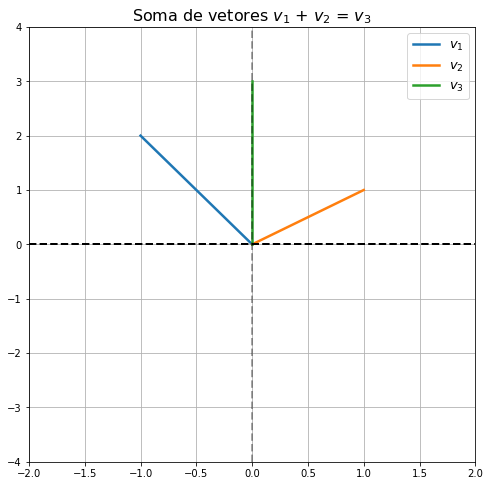

In [155]:
plt.figure(figsize=(8,8))
plt.plot([0,v1[0]],[0,v1[1]],linewidth=2.5,label='$v_1$')
plt.plot([0,v2[0]],[0,v2[1]],linewidth=2.5,label='$v_2$')
plt.plot([0,v3[0]],[0,v3[1]],linewidth=2.5,label='$v_3$')

s1 = sym.latex(sym.sympify(v1))
s2 = sym.latex(sym.sympify(v2))
s3 = sym.latex(sym.sympify(v3))
display(Math('%s+%s=%s' %(s1,s2,s3)))

plt.plot([-2,2],[0,0],'k--',linewidth=2)
plt.plot([0,0],[-4,4],'k--',linewidth=2, alpha=0.35)
plt.axis([-2,2,-4,4])
plt.legend(fontsize=13)
plt.title('Soma de vetores $v_1$ + $v_2$ = $v_3$', fontsize=16)
plt.grid()
plt.show()

### Produto Escalar

O Produto Escalar é uma das mais importantes operações em toda a Álgebra Linear, sendo assim, ela tem uma importante relevância em áreas como Machine Learning e Estatística.

In [132]:
v = np.arange(10,22,3)
w = np.arange(5,15,3)

display(Math(sym.latex(sym.sympify(v))))
display(Math(sym.latex(sym.sympify(w))))

# Método 1
produto_escalar_1 = 0
for i in range(len(v)):
    produto_escalar_1 = produto_escalar_1 + v[i] * w[i]

# Método 2
produto_escalar_2 = np.dot(v,w)

# Método 3
produto_escalar_3 = np.sum(np.multiply(v,w))

# Método 4
produto_escalar_4 = sum([i*j for i,j in zip(v,w)])

display(Math(sym.latex(sym.sympify(produto_escalar_1))))
display(Math(sym.latex(sym.sympify(produto_escalar_2))))
display(Math(sym.latex(sym.sympify(produto_escalar_3))))
display(Math(sym.latex(sym.sympify(produto_escalar_4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [109]:
def produto_escalar(v,w):
    v = np.squeeze(v)
    w = np.squeeze(w)
    # Testar se o produto escalar está definido
    if len(v) != len(w):
        raise ValueError('Vetores devem ter o mesmo comprimento')
    # Computar e mostrar o produto escalar
    display(Math('v^Tw=%g' %np.dot(v,w)))

In [110]:
v1 = np.array([0,1])
v2 = np.array([1,0])

produto_escalar(v1,v2)
produto_escalar(v,w)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [117]:
w1 = np.random.randn(1,10)
w2 = np.random.randn(1,10)

print(w1)
print(w2)

produto_escalar(w1,w2)

[[-1.70909891  1.41714112 -0.24613419  0.22832054  0.26288249 -0.1168051
  -0.03329177 -0.07303317  0.37807335 -0.73852893]]
[[ 1.05166837  0.3668545   0.57221965 -0.71387896 -0.18524658 -0.52154206
   0.99391071 -0.9694259   0.93879719 -0.0605704 ]]


<IPython.core.display.Math object>

### Aplicação do Produto Escalar: Coeficiente de Correlação

In [158]:
# Dados 
cursos = [4,5,8,2,9,9,1,3,7]
notas = [6,7,9,3,9,3,1,6,7]

# Média central
c = cursos - np.mean(cursos)
n = notas - np.mean(notas)

# Computando a correlação
numerador = np.dot(c,n)
denominador = np.sqrt(np.dot(c,c)) * np.sqrt(np.dot(n,n))
correlacao = numerador / denominador 
corr = np.corrcoef(c,n)[1][0]

print(correlacao)
print(corr)

0.60530206024143
0.60530206024143


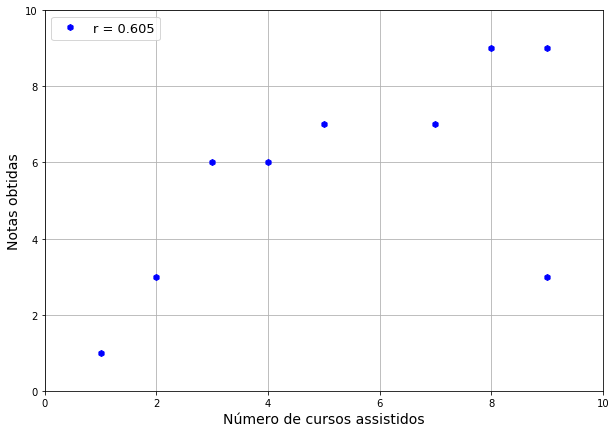

In [179]:
plt.figure(figsize=(10,7))
plt.plot(cursos, notas, 'bh', label='r = %g' %np.round(correlacao,3))
plt.grid()
plt.legend(fontsize=13,loc='upper left')
plt.axis([0,10,0,10])
plt.xlabel('Número de cursos assistidos', fontsize=14)
plt.ylabel('Notas obtidas', fontsize=14)
plt.show()

### Produto Externo

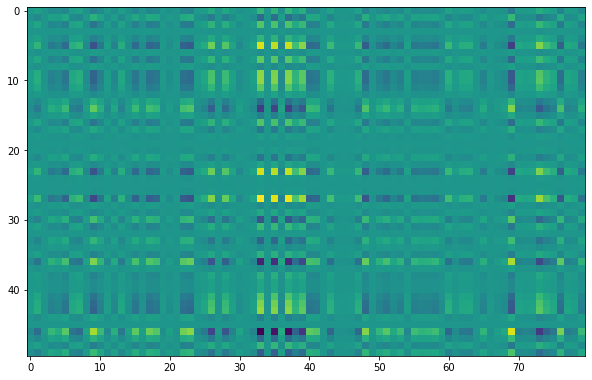

In [185]:
v1 = np.random.randn(50)
v2 = np.random.randn(80)

produto_externo = np.outer(v1,v2)

plt.figure(figsize=(10,7))
plt.imshow(produto_externo)
plt.show()

In [190]:
v = np.arange(1,11)
w = np.arange(1,6)

# Testando se o produto externo é comutativo de matriz
print(np.outer(v,w))
print(np.outer(w,v))

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]
 [ 6 12 18 24 30]
 [ 7 14 21 28 35]
 [ 8 16 24 32 40]
 [ 9 18 27 36 45]
 [10 20 30 40 50]]
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]
 [ 3  6  9 12 15 18 21 24 27 30]
 [ 4  8 12 16 20 24 28 32 36 40]
 [ 5 10 15 20 25 30 35 40 45 50]]


In [194]:
# Testando se o produto externo é comutativo de multiplicação de escalares
s = 4

resultado_1 = s * np.outer(v,w)
resultado_2 = np.outer(s*v,w)
resultado_3 = np.outer(v,s*w)
resultado_4 = np.outer(v,w)*s

print(resultado_1-resultado_2)
print(resultado_1-resultado_3)
print(resultado_2-resultado_4)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### Multiplicação de Matrizes

In [205]:
A = np.random.randn(14,10)
B = np.random.randn(14,10)
C = np.random.randn(10,14)

# Para a multiplicação funcionar, as dimensões interiores devem ser idênticas
display(Math(sym.latex(sym.sympify(A@C))))
display(Math(sym.latex(sym.sympify(B@C))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [215]:
def multiplicacao_matrizes(A,B):
    # Obtendo o tamanho das matrizes
    tam_A = np.shape(A)
    tam_B = np.shape(B)
    # Checando os tamanhos 
    if tam_A[1] != tam_B[0]:
        raise ValueError('Dimensões interiores não correspondem')
    # Inicializando a matriz de output
    C = np.zeros((tam_A[0],tam_B[1]))
    # Computando
    for i in range(tam_A[0]):
        for j in range(tam_B[1]):
            C[i,j] = np.dot(A[i,:],B[:,j])
    return C

In [219]:
A = np.random.randn(4,6)
B = np.random.randn(6,4)

display(Math(sym.latex(sym.sympify(multiplicacao_matrizes(A,B)))))
display(Math(sym.latex(sym.sympify(A@B))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [235]:
X = np.array([[1,2,3]])
Y = np.array([[2,3,4],[2,3,4],[3,3,5]])

x = sym.latex(sym.sympify(X))
y = sym.latex(sym.sympify(Y))
xy = sym.latex(sym.sympify(X@Y))

display(Math('%s \\times %s = %s' %(x,y,xy)))

<IPython.core.display.Math object>

### Transposição de Vetores e Matrizes

$ v^{TT} = v $

In [242]:
# Criando um vetor de linhas
r = np.random.randn(1,10) # 1x10
display(Math(sym.latex(sym.sympify(r))))

# Transpondo o vetor
r_trans_1 = np.transpose(r)
r_trans_2 = r.T

display(Math(sym.latex(sym.sympify(r_trans_1)))) # 10x1
display(Math(sym.latex(sym.sympify(r_trans_2)))) # 10x1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

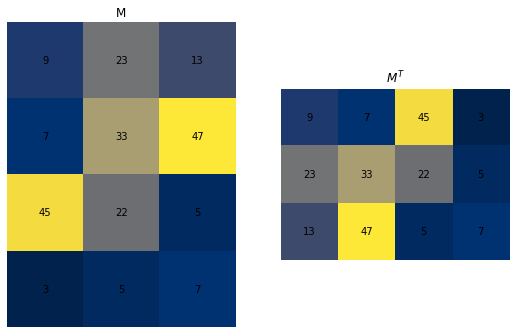

In [290]:
matriz = np.array([[9,23,13],[7,33,47],[45,22,5],[3,5,7]])
matriz_trans = matriz.T

fig, ax = plt.subplots(1,2)
fig.set_figheight(12)
fig.set_figwidth(9)

ax[0].imshow(matriz, cmap='cividis')
ax[0].set_title('M')

ax[1].imshow(matriz_trans, cmap='cividis')
ax[1].set_title('$M^T$')

for (j,i),label in np.ndenumerate(matriz):
    ax[0].text(i,j,label,ha='center',va='center')
    
for (j,i),label in np.ndenumerate(matriz_trans):    
    ax[1].text(i,j,label,ha='center',va='center')

ax[0].axis('off')
ax[1].axis('off')
plt.show()

### Matrizes Simétricas

$ A = A^T $

Vamos demonstrar que uma matriz (quadrada ou não-quadrada) multiplicada por sua versão transposta é **quadrada simétrica**

In [308]:
m = 5
n = 7

matrix = np.random.randn(m,n)
display(Math(sym.latex(sym.sympify(matrix))))

# Matrix multiplicada por sua versão transposta
M = matrix @ matrix.T
display(Math(sym.latex(sym.sympify(M))))

# Mostrando que ela é quadrada
print(np.shape(M))

# Mostrando que ela é simétrica
display(Math(sym.latex(sym.sympify(M - M.T))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(5, 5)


<IPython.core.display.Math object>

### Matrizes Especiais

In [310]:
# Matriz Identidade
I = np.eye(4)
display(Math(sym.latex(sym.sympify(I))))

<IPython.core.display.Math object>

In [312]:
# Matriz de Zeros
Z = np.zeros((4,4))
display(Math(sym.latex(sym.sympify(Z))))

<IPython.core.display.Math object>

In [316]:
# Matriz Diagonal
D = np.diag([1,4,6,3])
display(Math(sym.latex(sym.sympify(D))))

d = np.diagonal(D)
display(Math(sym.latex(sym.sympify(d))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [407]:
# Matriz Triangular
T = np.random.randn(7,7)
display(Math(sym.latex(sym.sympify(np.triu(T)))))

<IPython.core.display.Math object>

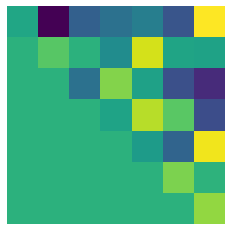

In [408]:
# Upper
plt.imshow(np.triu(T))
plt.axis('off')
plt.show()

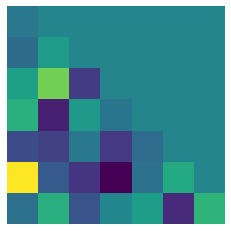

In [409]:
# Lower
plt.imshow(np.tril(T))
plt.axis('off')
plt.show()

In [372]:
matriz = np.random.randint(-4,5,(4,4))
identidade = np.eye(4)
upper = np.triu(np.random.randn(4,4))

display(Math('%s \\times %s = %s' 
             %(
                 sym.latex(sym.sympify(matriz)),
                 sym.latex(sym.sympify(identidade)),
                 sym.latex(sym.sympify(matriz@identidade)
                ))))

<IPython.core.display.Math object>

In [350]:
display(Math('%s \\times %s = %s' 
             %(
                 sym.latex(sym.sympify(matriz)),
                 sym.latex(sym.sympify(upper)),
                 sym.latex(sym.sympify(matriz@upper)
                ))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

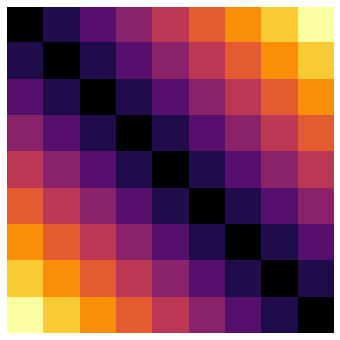

In [393]:
# Matriz de Toeplitz
mat = np.arange(1,10)
display(Math(sym.latex(sym.sympify(mat))))

toep = toeplitz(mat)
display(Math(sym.latex(sym.sympify(toep))))

plt.figure(figsize=(6,6))
plt.imshow(toep, cmap='inferno')
plt.axis('off')
plt.show()

### Matriz Inversa

$ Ax = b $

$ A^{-1}Ax = A^{-1}b $

$ Ix = A^{-1}b $

$ x = A^{-1}b $

Uma matriz pode ser invertida se:

- For quadrada
- For de rank completo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

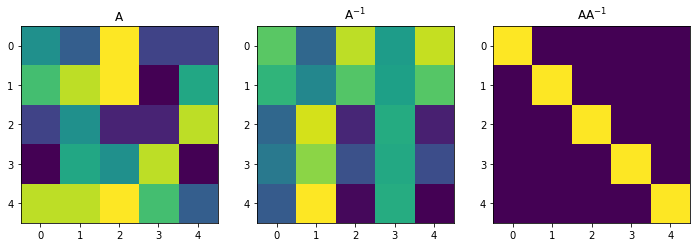

In [401]:
m = 5

A = np.random.randint(-5,6,(m,m))
display(Math(sym.latex(sym.sympify(A))))

I = np.linalg.inv(A)
display(Math(sym.latex(sym.sympify(I))))

fig, ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(12)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(I)
ax[1].set_title('A$^{-1}$')

ax[2].imshow(A@I)
ax[2].set_title('AA$^{-1}$')
plt.show()

### Matriz Pseudoinversa

In [11]:
# Criando uma matriz 5x5
m = 5

A = np.random.randint(-m,m+1,(m,m))
A[:,0] = A[:,1]
display(Math(sym.latex(sym.sympify(A))))

pseudo_inversa = np.linalg.pinv(A)
display(Math(sym.latex(sym.sympify(pseudo_inversa))))

display(Math(sym.latex(sym.sympify(A@pseudo_inversa))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

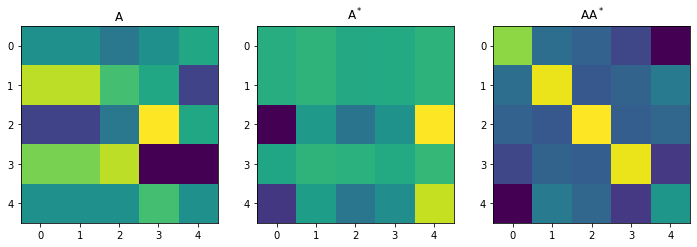

In [12]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(12)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(pseudo_inversa)
ax[1].set_title('A$^*$')

ax[2].imshow(A@pseudo_inversa)
ax[2].set_title('AA$^*$')

plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

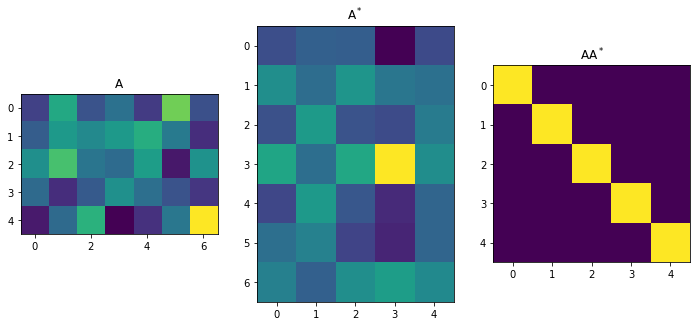

In [13]:
# Criando uma matriz 5x7
m = 5

A = np.random.randn(m,m+2)
display(Math(sym.latex(sym.sympify(A))))

pseudo_inversa = np.linalg.pinv(A)
display(Math(sym.latex(sym.sympify(pseudo_inversa))))

display(Math(sym.latex(sym.sympify(A@pseudo_inversa))))

fig, ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(12)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(pseudo_inversa)
ax[1].set_title('A$^*$')

ax[2].imshow(A@pseudo_inversa)
ax[2].set_title('AA$^*$')

plt.show()

### Resolvendo Sistemas de Equações

$ 2x + y - z = 1 $

$ 3x + 4y + 2z = 13 $

$ x - 5y - 2z = 0 $

In [18]:
X = np.array([[2,1,-1],[3,4,2],[1,-5,-2]])
y = np.array([1,13,0])

beta_1 = np.linalg.inv(X.T@X) @ (X.T@y)
beta_2 = np.linalg.solve(X,y)


display(Math(sym.latex(sym.sympify(beta_1))))
display(Math(sym.latex(sym.sympify(beta_2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Exercícios

------------

1)

$ 3x_1 -  y_1 = 6 $

$ -x_1 + y_1 = 2 $

------------

2)

$ 3x_2 - y_2 = 6 $

$ 1.5x_2 - 0.5y_2 = 3 $

------------

3)

$ 3x_3 - y_3 = 6 $

$ 1.5x_3 - 0.5y_3 = 2 $

------------

In [21]:
# Representando os sistemas como matrizes
# Sistema 1
X1 = np.array([[3,-1],[-1,1]])
y1 = np.array([6,2])

# Sistema 2
X2 = np.array([[3,-1],[1.5,-0.5]])
y2 = np.array([6,3])

# Sistema 3
X3 = np.array([[3,-1],[1.5,-0.5]])
y3 = np.array([6,2])

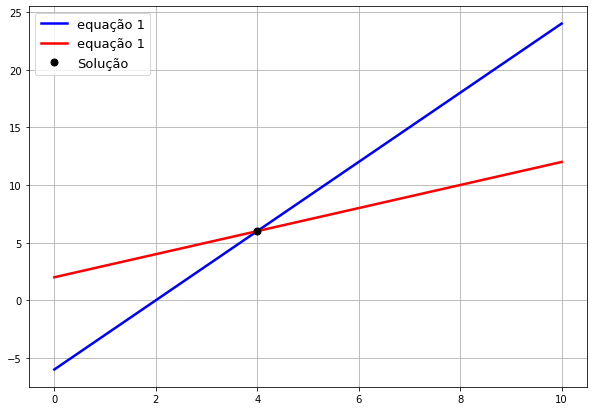

In [40]:
# 1)
# Convertendo para o formato: y = mx + b
xlim = np.array([0,10])

yy1 = -X1[0,0] / X1[0,1] * xlim + y1[0] / X1[0,1]
yy2 = -X1[1,0] / X1[1,1] * xlim + y1[1] / X1[1,1]

# Plotando o gráfico
plt.figure(figsize=(10,7))
plt.plot(xlim, yy1, 'b', label='equação 1', linewidth=2.5)
plt.plot(xlim, yy2, 'r', label='equação 1', linewidth=2.5)

# Resolvendo o sistema
b = np.linalg.solve(X1,y1)
plt.plot(b[0],b[1],'ko',markersize=7,label='Solução')

plt.legend(fontsize=13)
plt.grid()
plt.show()

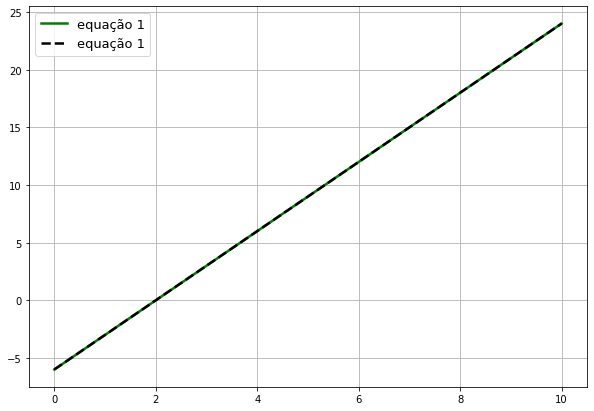

In [39]:
# 2)
# Convertendo para o formato: y = mx + b
xlim = np.array([0,10])

yy1 = -X2[0,0] / X2[0,1] * xlim + y2[0] / X2[0,1]
yy2 = -X2[1,0] / X2[1,1] * xlim + y2[1] / X2[1,1]

# Plotando o gráfico
plt.figure(figsize=(10,7))
plt.plot(xlim, yy1, 'g', label='equação 1', linewidth=2.5)
plt.plot(xlim, yy2, 'k--', label='equação 1', linewidth=2.5)

# Não há uma única solução, existem infinitas!

plt.legend(fontsize=13)
plt.grid()
plt.show()

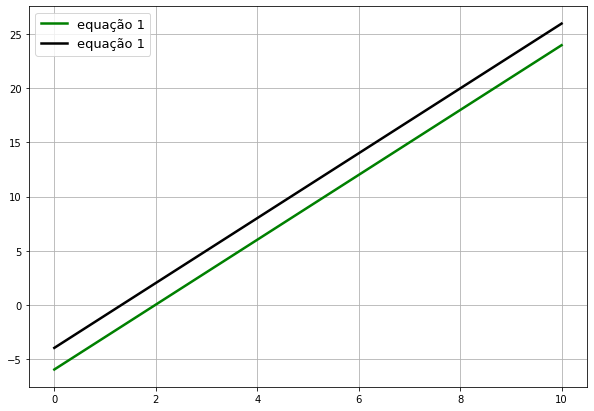

In [38]:
# 3)
# Convertendo para o formato: y = mx + b
xlim = np.array([0,10])

yy1 = -X3[0,0] / X3[0,1] * xlim + y3[0] / X3[0,1]
yy2 = -X3[1,0] / X3[1,1] * xlim + y3[1] / X3[1,1]

# Plotando o gráfico
plt.figure(figsize=(10,7))
plt.plot(xlim, yy1, 'g', label='equação 1', linewidth=2.5)
plt.plot(xlim, yy2, 'k', label='equação 1', linewidth=2.5)

# Não há solução para esse sistema

plt.legend(fontsize=13)
plt.grid()
plt.show()

### Visualizando a Multiplicação de Matrizes-Vetores

In [44]:
# Definindo uma matriz M
M = np.array([
    [0.5,1],
    [1,0.5]
])

# Definindo um vetor v
v = np.array([1,2])

display(Math(sym.latex(sym.sympify(M))))
display(Math(sym.latex(sym.sympify(v))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
# Multiplicação do vetor por uma matriz
Mv = M@v
display(Math(sym.latex(sym.sympify(Mv))))

<IPython.core.display.Math object>

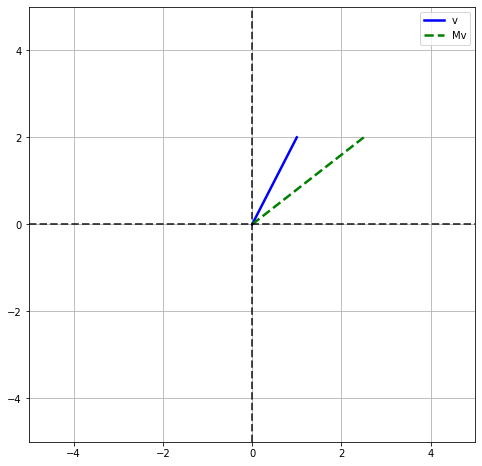

In [54]:
plt.figure(figsize=(8,8))
plt.plot([0,v[0]],[0,v[1]], 'b', linewidth=2.5, label='v')
plt.plot([0,Mv[0]],[0,Mv[1]], 'g--', linewidth=2.5, label='Mv')

plt.plot([0,0],[-5,5],'k--',linewidth=2, alpha=0.7)
plt.plot([-5,5],[0,0],'k--',linewidth=2, alpha=0.7)

plt.axis([-5,5,-5,5])
plt.grid()
plt.legend()
plt.show()

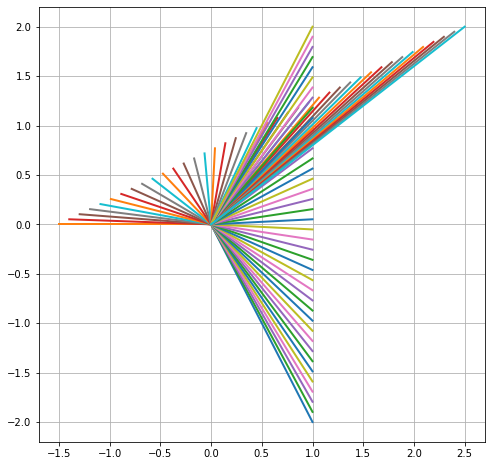

In [60]:
componente_v = np.linspace(-2,2,40)

plt.figure(figsize=(8,8))
plt.grid()

for a in componente_v:
    v = np.array([1,a])
    Mv = M@v
    plt.plot([0,v[0]],[0,v[1]], linewidth=2)
    plt.plot([0,Mv[0]],[0,Mv[1]], linewidth=2)

### Eigenvalores e Eigenvetores

- Interpretação algébrica e geométrica dos eigenvalores e eigenvetores
- Como executar eigendecomposição em Python
- O que a diagonalização significa

**Eigendecomposição** é definido apenas para matrizes quadradas (m x m)

**Decomposição de valor singular** funciona para qualquer matriz (m x n)

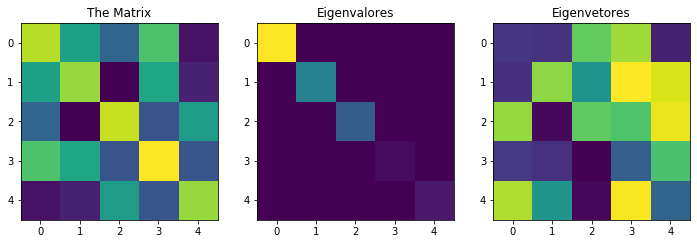

In [71]:
M = np.random.randint(-5,6,(5,5))
M = M@M.T

eigvals, eigvecs = np.linalg.eig(M)

fig, ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(12)
ax[0].imshow(M)
ax[0].set_title('The Matrix')
ax[1].imshow(np.diag(eigvals))
ax[1].set_title('Eigenvalores')
ax[2].imshow(eigvecs)
ax[2].set_title('Eigenvetores')
plt.show()

In [70]:
Mv = M @ eigvecs[:,0]
lambda_v = eigvals[0] * eigvecs[:,0]

print(M)
print(Mv)
print(eigvecs[:,0])
print(eigvals[0])
print(lambda_v)

[[ 30  -7  21  -9  31]
 [ -7  39 -36  -7   0]
 [ 21 -36  70  15   0]
 [ -9  -7  15  18 -15]
 [ 31   0   0 -15  46]]
[-32.84862221  50.63800935 -81.42991035 -12.47280542 -14.5429482 ]
[-0.3184367   0.49088818 -0.78938689 -0.12091219 -0.14098029]
103.15589410663631
[-32.84862221  50.63800935 -81.42991035 -12.47280542 -14.5429482 ]


### Eigendecomposição

[2.12132034 2.12132034] [2.12132034 2.12132034]


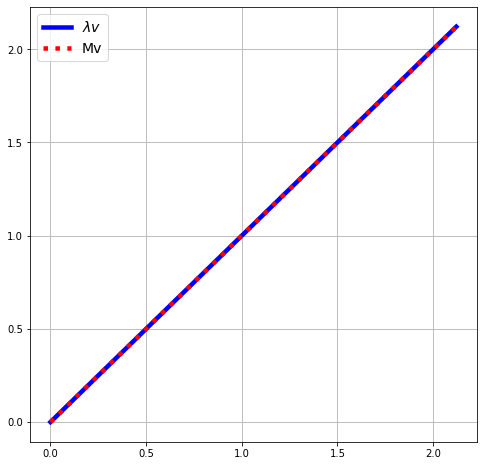

In [79]:
M = np.array([[1,2],[2,1]])
d,V = np.linalg.eig(M)

lv = d[0] * V[:,0]
mv = M @ V[:,0]

print(lv,mv)

plt.figure(figsize=(8,8))
plt.plot([0,lv[0]],[0,lv[1]], 'b', label='$\\lambda v$', linewidth=4.5)
plt.plot([0,mv[0]],[0,mv[1]], 'r:', label='Mv', linewidth=4.5)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [88]:
m = 6
Q = np.random.randn(m,m)
display(Math(sym.latex(sym.sympify(Q))))
# Uma matriz multiplicada por sua versão tranposta é sempre uma matriz simétrica
Q = Q @ Q.T
display(Math(sym.latex(sym.sympify(Q))))
# Eigendecomposição
d,V = np.linalg.eig(Q)

produtos_escalares = np.zeros((m,m))

# Computando os produtos escalares entre os eigenvetores
for i in range(m):
    for j in range(m):
        produtos_escalares[i,j] = np.dot(V[:,i],V[:,j])

display(Math(sym.latex(sym.sympify(np.round(produtos_escalares)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Decomposição de valor singular

(405, 314, 3)


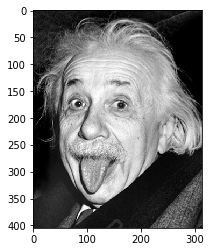

In [92]:
ein = Image.open('einstein.jpg')
# 405 x 314 pixels
print(np.shape(ein))
plt.imshow(ein)
plt.show()

(405, 314)


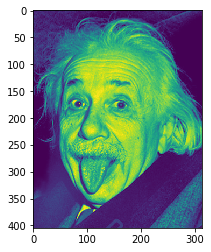

In [93]:
ein = Image.open('einstein.jpg')
ein = np.mean(ein,2)
# 405 x 314 pixels
print(np.shape(ein))
plt.imshow(ein)
plt.show()

In [96]:
# Computando o SVD
U, s, V = np.linalg.svd(ein)
print(np.shape(U))
print(np.shape(s))
print(np.shape(V))

(405, 405)
(314,)
(314, 314)


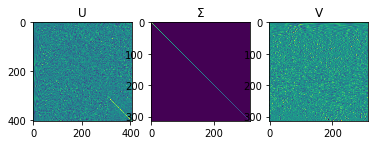

In [106]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V')
plt.show()

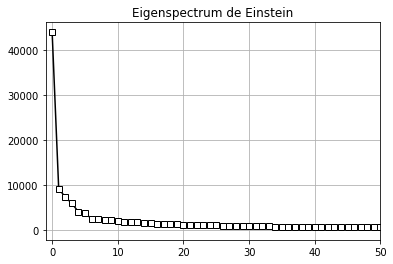

In [104]:
# Apresentando os valores de sigma
plt.grid()
plt.plot(s, 'ks-', markerfacecolor='w')
plt.xlim([-1,50])
plt.title('Eigenspectrum de Einstein')
plt.show()

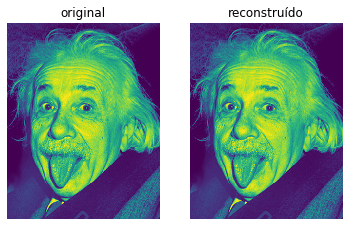

In [112]:
# Reconstruindo Einstein
S = np.zeros(np.shape(ein))

for i in range(len(s)):
    S[i,i] = s[i]

rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('reconstruído')
plt.show()

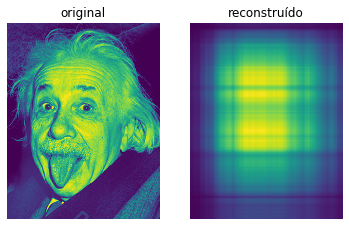

In [128]:
# Reconstruindo Einstein
S = np.zeros(np.shape(ein))

# Imprimindo o primeiro componente
for i in range(1):
    S[i,i] = s[i]

rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('reconstruído')
plt.show()

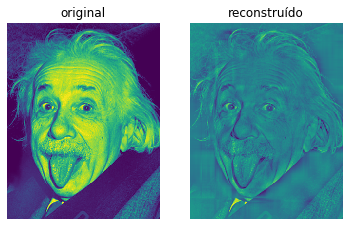

In [132]:
# Reconstruindo Einstein
S = np.zeros(np.shape(ein))

# Ignorando os 5 primeiros componentes
for i in range(5,len(s)):
    S[i,i] = s[i]

rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('reconstruído')
plt.show()

### Revisão

In [135]:
# Criando um vetor de colunas
v = np.array([[-2],[3]])
display(Math(sym.latex(sym.sympify(v))))

<IPython.core.display.Math object>

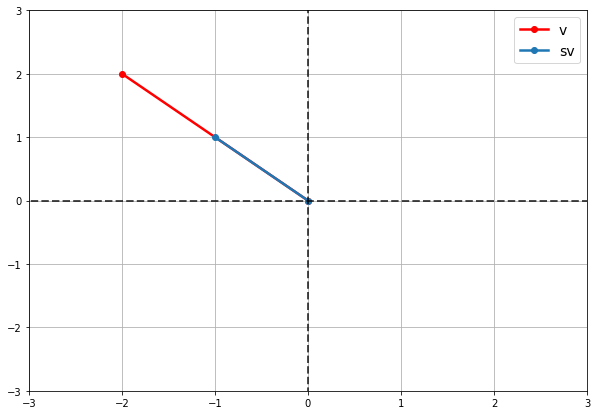

In [148]:
# Visualizando multiplicação de escalares-vetores
v = np.array([-2,2])
s = 0.5

sv = v * s

plt.figure(figsize=(10,7))
plt.plot([0,v[0]],[0,v[1]],'ro-',linewidth=2.5,label='v')
plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=2.5,label='sv')
plt.plot([0,0],[-5,5],'k--',linewidth=2, alpha=0.7)
plt.plot([-5,5],[0,0],'k--',linewidth=2, alpha=0.7)

plt.legend(fontsize=14)
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [150]:
# Algoritmo para computar o produto escalar
v = np.random.randn(7)
w = np.random.randn(7)

pe1 = 0
for i in range(len(v)):
    pe1 += v[i] * w[i]

pe2 = np.dot(v,w)

print(pe1,pe2)

1.8017102463264814 1.8017102463264814


(5, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

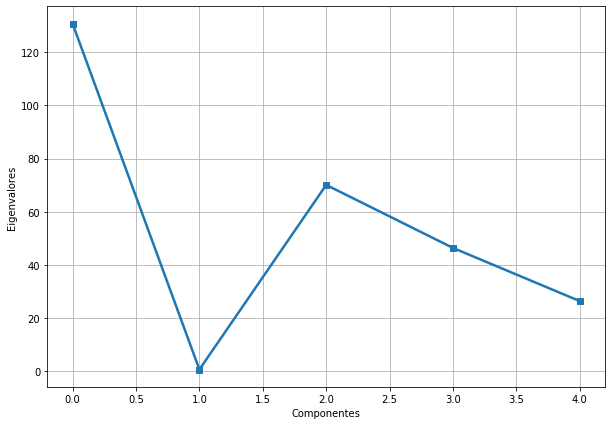

In [159]:
# Plotando o eigenspectrum
M = np.random.randint(-5,5,(5,5))
M = M @ M.T
print(np.shape(M))

# eigendecomposição
eigvals, eigvecs = np.linalg.eig(M)
display(Math(sym.latex(sym.sympify(eigvals))))
display(Math(sym.latex(sym.sympify(eigvecs))))

plt.figure(figsize=(10,7))
plt.plot(np.matrix.flatten(eigvals),'s-',linewidth=2.5)
plt.xlabel('Componentes')
plt.ylabel('Eigenvalores')
plt.grid()
plt.show()

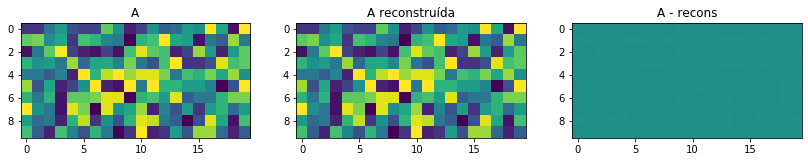

In [169]:
# Reconstruindo uma matriz baseado em seu SVD
A = np.random.randint(-10,11,(10,20))

U,s,V = np.linalg.svd(A)

# Reconstruir S
S = np.zeros(np.shape(A))

for i in range(len(s)):
    S[i,i] = s[i]

recons = U @ S @ V

fig, ax = plt.subplots(1,3)
fig.set_figheight(18)
fig.set_figwidth(14)

ax[0].imshow(A, vmin=-10, vmax=10)
ax[0].set_title('A')

ax[1].imshow(recons, vmin=-10, vmax=10)
ax[1].set_title('A reconstruída')

ax[2].imshow(A-recons, vmin=-10, vmax=10)
ax[2].set_title('A - recons')

plt.show()